In [171]:
import pandas as pd
import numpy as np
import nltk
import re
import sklearn
import gensim

In [172]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [173]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [174]:
# Drop columns with names starting with 'Unnamed'
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [175]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [176]:
#renaming columns

data.rename(columns= {'v1': 'label','v2':'messages'},inplace=True)

data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [177]:
data.shape

(5572, 2)

In [178]:
#Data cleaning and preprocessing

nltk.download(['stopwords','punkt'])

[nltk_data] Downloading package stopwords to C:\Users\KAUSTHAB
[nltk_data]     DUTTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\KAUSTHAB
[nltk_data]     DUTTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [179]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer #for stemming

In [180]:
ps = PorterStemmer()

In [225]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in stopwords.words('english')])

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    text = ' '.join([ps.stem(word) for word in words])

    return text

In [226]:
data['cleaned_message'] = data['messages'].apply(preprocess_text)

In [227]:
data.head()

,label,messages,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in a wkli comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goe to usf he live around ...


In [182]:
len(corpus)

5572

In [183]:
## creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

In [128]:
cv = CountVectorizer(max_features=2500)

In [129]:
X = cv.fit_transform(corpus).toarray()

In [130]:
X.shape

(5572, 2500)

In [131]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## N Grams

In [132]:
cv.vocabulary_

{'go': 870,
 'point': 1613,
 'crazi': 493,
 'avail': 140,
 'bugi': 272,
 'great': 894,
 'world': 2440,
 'la': 1131,
 'cine': 391,
 'got': 885,
 'wat': 2370,
 'ok': 1509,
 'lar': 1143,
 'joke': 1089,
 'wif': 2408,
 'oni': 1517,
 'free': 809,
 'entri': 679,
 'wkli': 2429,
 'comp': 431,
 'win': 2412,
 'fa': 722,
 'cup': 510,
 'final': 765,
 'tkt': 2170,
 'st': 2014,
 'may': 1315,
 'text': 2129,
 'receiv': 1722,
 'question': 1684,
 'std': 2025,
 'txt': 2233,
 'rate': 1703,
 'appli': 98,
 'dun': 641,
 'say': 1814,
 'earli': 645,
 'alreadi': 66,
 'nah': 1446,
 'think': 2144,
 'goe': 873,
 'usf': 2297,
 'live': 1205,
 'around': 113,
 'though': 2150,
 'freemsg': 811,
 'hey': 950,
 'darl': 533,
 'week': 2385,
 'word': 2437,
 'back': 153,
 'like': 1191,
 'fun': 829,
 'still': 2027,
 'tb': 2105,
 'xxx': 2468,
 'chg': 373,
 'send': 1852,
 'rcv': 1706,
 'even': 693,
 'brother': 261,
 'speak': 1996,
 'treat': 2205,
 'per': 1570,
 'request': 1755,
 'mell': 1334,
 'oru': 1535,
 'minnaminungint': 1367,

In [133]:
cv1 = CountVectorizer(max_features=100,binary=True,ngram_range=(1,2))
X = cv1.fit_transform(corpus).toarray()

In [134]:
cv1.vocabulary_

{'go': 22,
 'great': 25,
 'got': 24,
 'wat': 90,
 'ok': 57,
 'free': 18,
 'win': 94,
 'text': 78,
 'txt': 86,
 'say': 68,
 'alreadi': 0,
 'think': 81,
 'hey': 28,
 'week': 92,
 'back': 3,
 'like': 38,
 'still': 74,
 'send': 70,
 'even': 15,
 'friend': 19,
 'prize': 63,
 'claim': 7,
 'call': 4,
 'mobil': 48,
 'co': 8,
 'home': 30,
 'want': 89,
 'today': 83,
 'cash': 6,
 'day': 12,
 'repli': 65,
 'www': 96,
 'right': 66,
 'thank': 79,
 'take': 76,
 'time': 82,
 'messag': 45,
 'oh': 56,
 'ye': 97,
 'make': 43,
 'way': 91,
 'feel': 16,
 'dont': 14,
 'miss': 47,
 'ur': 87,
 'tri': 85,
 'da': 11,
 'lor': 39,
 'meet': 44,
 'realli': 64,
 'get': 20,
 'know': 33,
 'love': 40,
 'let': 37,
 'work': 95,
 'wait': 88,
 'yeah': 98,
 'tell': 77,
 'pleas': 62,
 'msg': 50,
 'see': 69,
 'pl': 61,
 'need': 52,
 'tomorrow': 84,
 'hope': 31,
 'well': 93,
 'lt': 41,
 'gt': 26,
 'lt gt': 42,
 'ask': 1,
 'morn': 49,
 'happi': 27,
 'sorri': 73,
 'give': 21,
 'new': 53,
 'find': 17,
 'year': 99,
 'later': 35,
 '

## TF-IDF

In [135]:
from nltk.stem import WordNetLemmatizer
wordlemmatize = WordNetLemmatizer()

In [137]:
corpus = []

for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',data['messages'][i])
    review = review.lower()
    review = review.split()
    review = [wordlemmatize.lemmatize(word) for word in review if word not in stopwords.words('english') ]
    review = ' '.join(review)
    corpus.append(review)

In [138]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)

In [140]:
X = tfidf.fit_transform(corpus).toarray()

In [141]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [142]:
tfidf.vocabulary_

{'go': 26,
 'great': 30,
 'got': 29,
 'ok': 61,
 'free': 22,
 'win': 95,
 'may': 47,
 'text': 84,
 'txt': 89,
 'say': 72,
 'already': 1,
 'think': 86,
 'hey': 33,
 'week': 93,
 'back': 5,
 'like': 41,
 'still': 79,
 'send': 74,
 'friend': 23,
 'customer': 14,
 'prize': 67,
 'claim': 9,
 'call': 6,
 'mobile': 52,
 'month': 53,
 'co': 10,
 'home': 35,
 'want': 91,
 'today': 88,
 'cash': 8,
 'day': 15,
 'reply': 69,
 'www': 97,
 'take': 82,
 'time': 87,
 'message': 49,
 'com': 11,
 'yes': 99,
 'make': 46,
 'way': 92,
 'dont': 17,
 'miss': 51,
 'ur': 90,
 'going': 27,
 'first': 21,
 'finish': 20,
 'lunch': 45,
 'lor': 42,
 'meet': 48,
 'really': 68,
 'know': 37,
 'always': 2,
 'love': 43,
 'let': 40,
 'room': 70,
 'work': 96,
 'sure': 81,
 'tell': 83,
 'please': 65,
 'msg': 54,
 'see': 73,
 'pls': 66,
 'need': 56,
 'hope': 36,
 'well': 94,
 'lt': 44,
 'gt': 31,
 'get': 24,
 'ask': 3,
 'place': 64,
 'happy': 32,
 'sorry': 77,
 'give': 25,
 'new': 57,
 'end': 18,
 'find': 19,
 'year': 98,
 '

In [143]:
tfidf = TfidfVectorizer(max_features=100,ngram_range=(2,2))
X = tfidf.fit_transform(corpus).toarray()

In [144]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
tfidf.vocabulary_

{'free entry': 34,
 'oru minnaminunginte': 58,
 'nurungu vettam': 56,
 'vettam set': 95,
 'callertune caller': 13,
 'caller press': 12,
 'press copy': 66,
 'copy friend': 24,
 'claim call': 17,
 'call claim': 4,
 'claim code': 18,
 'txt word': 87,
 'dont miss': 33,
 'ha ha': 40,
 'let know': 46,
 'call reply': 11,
 'please call': 61,
 'delivery tomorrow': 31,
 'lt gt': 50,
 'sm ac': 76,
 'sorry call': 77,
 'call later': 9,
 'cut short': 28,
 'awarded bonus': 3,
 'ur awarded': 89,
 'call free': 6,
 'hi hi': 43,
 'call customer': 5,
 'customer service': 27,
 'guaranteed cash': 38,
 'cash prize': 16,
 'trying contact': 84,
 'weekend draw': 98,
 'prize guaranteed': 69,
 'guaranteed call': 37,
 'valid hr': 94,
 'selected receive': 74,
 'private account': 67,
 'account statement': 0,
 'statement show': 79,
 'call identifier': 7,
 'identifier code': 44,
 'code expires': 21,
 'call landline': 8,
 'receive award': 70,
 'ur mob': 91,
 'per msg': 60,
 'new year': 54,
 'co uk': 20,
 'great week': 

## Word2Vec

In [184]:
from gensim.models import Word2Vec,KeyedVectors

In [185]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [186]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

corpus = [word_tokenize(sentence) for sentence in corpus]

[nltk_data] Downloading package punkt_tab to C:\Users\KAUSTHAB
[nltk_data]     DUTTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [187]:
len(corpus)

5572

In [188]:
model = Word2Vec(sentences=corpus, window=10,vector_size=300,epochs=10,min_count=10)



In [189]:
model.wv['call']

array([-3.12452346e-01,  2.04063758e-01,  1.64867938e-01,  1.07131362e-01,
        1.95205837e-01, -4.06175762e-01,  4.70548600e-01,  3.04586083e-01,
        5.25359474e-02,  1.35138050e-01,  1.00650163e-02,  1.17996018e-02,
        1.39066607e-01, -4.57939744e-01, -2.87237968e-02, -4.92027253e-02,
       -3.11684771e-03, -1.83378488e-01, -4.36711192e-01,  1.55949280e-01,
        7.23262429e-02, -1.51099101e-01,  1.41567457e-02, -3.21745992e-01,
        5.85174002e-02, -6.76586106e-02,  1.68882132e-01,  3.27199884e-02,
        2.41828077e-02, -6.03443682e-01, -3.13716717e-02,  4.51550307e-03,
       -1.46956250e-01, -1.06777595e-02,  9.53668803e-02,  1.75065070e-01,
        3.65295798e-01, -5.01841962e-01, -1.05486840e-01,  3.98340136e-01,
        2.82350834e-02,  2.03300472e-02,  4.51942794e-02,  9.87103432e-02,
        3.21900219e-01,  1.50610730e-01,  3.70814800e-01, -2.98820257e-01,
       -1.88787192e-01, -1.44376040e-01,  1.47886410e-01, -2.18924925e-01,
       -2.75363863e-01, -

In [190]:
print(model.wv.key_to_index)  # Returns True if "call" is in the vocabulary


{'u': 0, 'call': 1, 'go': 2, 'get': 3, 'ur': 4, 'gt': 5, 'lt': 6, 'come': 7, 'ok': 8, 'day': 9, 'free': 10, 'know': 11, 'love': 12, 'like': 13, 'time': 14, 'got': 15, 'good': 16, 'want': 17, 'text': 18, 'send': 19, 'txt': 20, 'need': 21, 'p': 22, 'one': 23, 'today': 24, 'n': 25, 'take': 26, 'see': 27, 'r': 28, 'stop': 29, 'home': 30, 'think': 31, 'repli': 32, 'lor': 33, 'k': 34, 'sorri': 35, 'tell': 36, 'mobil': 37, 'still': 38, 'back': 39, 'da': 40, 'make': 41, 'dont': 42, 'phone': 43, 'week': 44, 'say': 45, 'pleas': 46, 'hi': 47, 'new': 48, 'pl': 49, 'work': 50, 'later': 51, 'hope': 52, 'ask': 53, 'co': 54, 'msg': 55, 'miss': 56, 'min': 57, 'meet': 58, 'c': 59, 'dear': 60, 'messag': 61, 'night': 62, 'wait': 63, 'happi': 64, 'well': 65, 'thing': 66, 'much': 67, 'great': 68, 'claim': 69, 'tri': 70, 'give': 71, 'oh': 72, 'wat': 73, 'hey': 74, 'number': 75, 'na': 76, 'b': 77, 'thank': 78, 'friend': 79, 'ye': 80, 'way': 81, 'www': 82, 'e': 83, 'let': 84, 'prize': 85, 'wan': 86, 'feel': 87

In [191]:
model.wv['happy']

KeyError: "Key 'happy' not present"

In [193]:
model.wv.most_similar('call')

[('award', 0.9951919913291931),
 ('prize', 0.9918221831321716),
 ('claim', 0.991715669631958),
 ('ppm', 0.9915810227394104),
 ('cash', 0.9914100766181946),
 ('collect', 0.9909946322441101),
 ('guarante', 0.9884351491928101),
 ('receiv', 0.9874951243400574),
 ('contact', 0.9872496724128723),
 ('draw', 0.9860479235649109)]

In [194]:
model.wv.most_similar('king')

KeyError: "Key 'king' not present in vocabulary"

In [216]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [217]:
vec_size = 300

In [218]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [228]:
df_Word2Vec = pd.DataFrame(data['cleaned_message'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,0.002947,0.232943,-0.058789,0.041271,-0.003232,-0.190219,0.121850,0.335303,0.040848,-0.096043,...,-0.031616,0.236607,0.151294,-0.057109,0.126035,0.299338,-0.031665,-0.107098,0.055324,0.015060
1,0.022257,0.246722,-0.076064,0.033057,-0.025141,-0.180763,0.122674,0.346865,0.053721,-0.115493,...,-0.038444,0.250599,0.164609,-0.066077,0.127036,0.314256,-0.056962,-0.119745,0.070530,0.030530
2,-0.212993,0.236835,0.051566,0.065326,0.106708,-0.304503,0.256125,0.275429,-0.000221,0.042070,...,-0.100146,0.216267,0.075805,-0.040984,0.204415,0.223491,0.207150,-0.026884,0.024199,0.024973
3,0.031975,0.275817,-0.089649,0.035880,-0.033109,-0.201109,0.124231,0.381535,0.054237,-0.133789,...,-0.044057,0.279410,0.186439,-0.070462,0.136406,0.350288,-0.066215,-0.138395,0.081130,0.037299
4,0.008129,0.193990,-0.072263,0.084390,0.004198,-0.170807,0.099362,0.331572,0.021383,-0.087797,...,-0.005562,0.239292,0.147025,-0.041675,0.112211,0.292236,-0.045190,-0.123108,0.069982,-0.023107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,-0.170662,0.211745,0.047301,0.070071,0.102538,-0.311641,0.296246,0.305998,0.035703,0.029600,...,-0.144037,0.223366,0.067246,-0.111828,0.245783,0.260070,0.161953,-0.069511,-0.008106,0.051342
5568,0.033903,0.256331,-0.077040,0.032194,-0.025686,-0.176183,0.121036,0.354638,0.049288,-0.115349,...,-0.029241,0.254895,0.167903,-0.062820,0.120952,0.325904,-0.058741,-0.118113,0.071306,0.018708
5569,0.023225,0.177494,-0.069187,0.100129,0.014265,-0.185051,0.091444,0.349018,-0.001787,-0.081314,...,0.007502,0.239330,0.157991,-0.044810,0.140339,0.301340,-0.047415,-0.130863,0.053722,-0.049398
5570,-0.045679,0.213953,-0.039661,0.075916,0.031239,-0.211380,0.139134,0.331018,0.006005,-0.057843,...,-0.018476,0.243214,0.143704,-0.036092,0.146900,0.285149,0.027447,-0.095630,0.059985,-0.020607


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [229]:
X = df_Word2Vec
y = data['label']

In [243]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [230]:
X.shape

(5572, 300)

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

In [232]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 300)
(1115, 300)
(4457,)
(1115,)


In [233]:
nbc = GaussianNB()

In [234]:
# Train the Naive Bayes classifier
nbc.fit(X_train, y_train)

GaussianNB()

In [235]:
# Make predictions on the test set
y_pred = nbc.predict(X_test)

In [236]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9264573991031391


In [237]:
y_train_pred = nbc.predict(X_train)

In [238]:
y_train_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'spam', 'ham'], dtype='<U4')

In [240]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Test Accuracy: {train_accuracy}")

Test Accuracy: 0.9389724029616334


In [242]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.96      3721
        spam       0.89      0.72      0.80       736

    accuracy                           0.94      4457
   macro avg       0.92      0.85      0.88      4457
weighted avg       0.94      0.94      0.94      4457



In [248]:
from matplotlib import pyplot as plt
import seaborn as sns

In [253]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    #label_list = encoder.classes_.tolist()
    sns.heatmap(cm, annot = True,  fmt = '.0f',cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

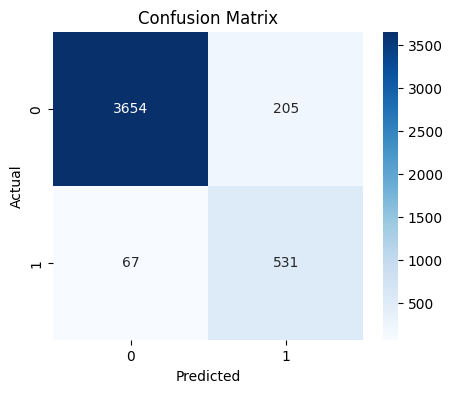

In [254]:
plot_confusion_matrix(y_train,y_train_pred)